In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('./data/vehicle_prod.csv')
df

,Unnamed: 0,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [44]:
df1 = df.rename(columns={'Unnamed: 0':'country'})
df1

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [45]:
df1.set_index('country', inplace=True)
df1

,2007,2008,2009,2010,2011
country,,,,,
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [46]:
#국가명 컬럼으로 인덱스 설정하고 데이터프레임 생성
df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [47]:
df['2007']

China      7.71
EU        19.02
US        10.47
Japan     10.87
Korea      4.04
Mexico     2.01
Name: 2007, dtype: float64

In [48]:
df[['2007']]

,2007
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [8]:
df.columns.tolist()

['2007', '2008', '2009', '2010', '2011']

In [9]:
df['2007'].tolist()

[7.71, 19.02, 10.47, 10.87, 4.04, 2.01]

In [10]:
df.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


#상관분석은 

#상관관계
변수들간의 값의 변화의 유사도, 
- 음의상관: 서로 반대 방향으로 변화, 증가>감소, 감소>증가
- 양의상관: 서로 같은 방향으로 변화, 증가>증가, 감소>감소

In [11]:
df.corr()

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [12]:
df.sum(axis=1, numeric_only=True)

China     59.79
EU        85.91
US        40.50
Japan     46.22
Korea     20.09
Mexico    10.35
dtype: float64

In [13]:
# 2007~2011 년까지의 생산량을 합한 total_production 컬럼을 생성해보자
df['total_production'] = df.sum(axis=1, numeric_only=True)
df

,2007,2008,2009,2010,2011,total_production
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35


In [14]:
#total 행으로 추가
df.loc['total'] = df.sum( numeric_only=True)

In [15]:
df

,2007,2008,2009,2010,2011,total_production
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35
total,54.12,50.77,45.04,55.68,57.25,262.86


In [16]:
# 시리즈 생성
month_se = pd.Series(['1월', '2월', '3월', '4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])

# 데이터프레임 생성
store_df = pd.DataFrame({
    '월': month_se,
    '수입': income_se,
    '지출': expenses_se
})

#순수입 컬럼 추가하기

In [17]:
store_df['순수입'] = store_df['수입']-store_df['지출']
store_df

,월,수입,지출,순수입
0,1월,9500,5040,4460
1,2월,6200,2350,3850
2,3월,6050,2300,3750
3,4월,7000,4800,2200


# 시각화

In [18]:
#국가명 컬럼으로 인덱스 설정하고 데이터프레임 생성
df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)
#df.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


<Axes: >

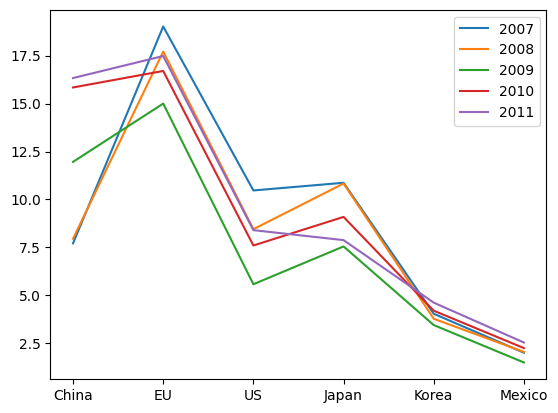

In [19]:
df.plot.line()

Text(0, 0.5, 'Production')

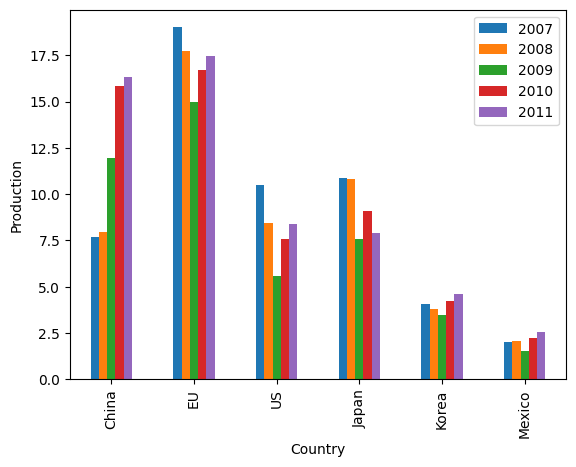

In [20]:
ax = df.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Production')


<Axes: >

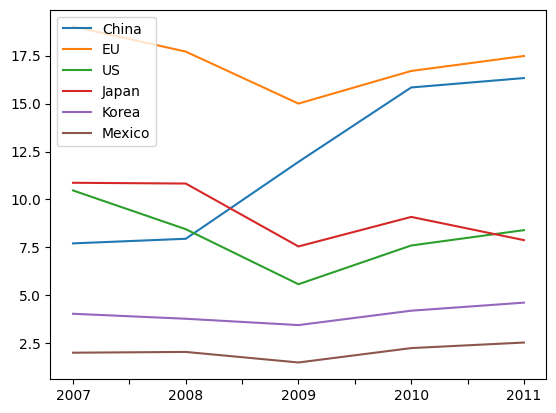

In [21]:
df_year = df.transpose()
df_year.plot.line()

# 결측치 np.nan, pd.NA

In [22]:
import numpy as np
np.nan == 0

False

In [23]:
x = [1,2, np.nan, 4]
x

[1, 2, nan, 4]

In [24]:
import pandas as pd
pd.NA #NaN
pd.isna(x)

array([False, False,  True, False])

In [25]:
pd.NA == np.nan

<NA>

In [26]:
pd.isnull(np.nan)

True

In [27]:
import pandas as pd
import numpy as np

data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

df = pd.DataFrame(data)
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [28]:
#결측치 갯수 확인
df.isnull()

,name,age,score,city
0,False,False,False,False
1,False,True,False,False
2,False,False,True,True
3,False,False,False,False
4,False,True,False,False


In [29]:
df.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


In [31]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [32]:
# 결측치 제거
df.dropna() #행전체 제거

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


In [33]:
df.dropna(axis=1) #열전체 제거

,name
0,Alice
1,Bob
2,Charlie
3,David
4,Eva


In [34]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [35]:
df.dropna(subset=['score'])  #해당컬럼의 na가 있는 행을 삭제

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


# 채우기

In [36]:
df['age'].fillna(0)

0    25.0
1     0.0
2    30.0
3    22.0
4     0.0
Name: age, dtype: float64

# 수치형 변수의 경우는 대표값 : 평균, 중앙값, 최빈값

In [37]:
df['age'].mean()

np.float64(25.666666666666668)

In [38]:
df['age'].fillna(df['age'].mean())

0    25.000000
1    25.666667
2    30.000000
3    22.000000
4    25.666667
Name: age, dtype: float64

In [39]:
df['age'].mean()

np.float64(25.666666666666668)

중앙값, 최빈값

In [ ]:
# median(), mode()

NameError: name 'median' is not defined

In [ ]:
df['Age'].fillna(df['Age'].median())

KeyError: 'age'

In [51]:
df['Age'].fillna(df['Age'].mode())

KeyError: 'Age'

In [ ]:
df['Age'].mode().iloc[0]

np.float64(22.0)

In [ ]:
df['Age'].fillna(df['Age'].mode().iloc[0])

0    25.0
1    22.0
2    30.0
3    22.0
4    22.0
Name: age, dtype: float64

In [ ]:
#직전값ffill, 직후값 bfill
df['score'].fillna(method='ffill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_20364\1310160729.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['score'].fillna(method='ffill')


0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
pd.__version__

'2.3.0'

In [ ]:
df['score'].ffill() #직전 값으로 채우기

0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
df['score'].bfill() #직후 값으로 채우기

0    90.0
1    85.0
2    88.0
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
df['age']<30

0     True
1    False
2    False
3     True
4    False
Name: age, dtype: bool

In [ ]:
df['age']

0    25.0
1     NaN
2    30.0
3    22.0
4     NaN
Name: age, dtype: float64

In [ ]:
df['age'].mask(df['age']<30, 30)  #컬럼의 값에 조건을 주어, 대체할 때 사용

0    30.0
1     NaN
2    30.0
3    30.0
4     NaN
Name: age, dtype: float64

In [ ]:
titanic_df = pd.read_csv('./data/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#결측치가 있는 컬럼 확인
pd.isna(titanic_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
titanic_df['Age'].median()

np.float64(28.0)

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_20364\2607116919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [ ]:
# 대체후 값 검증
titanic_df['Age'].mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

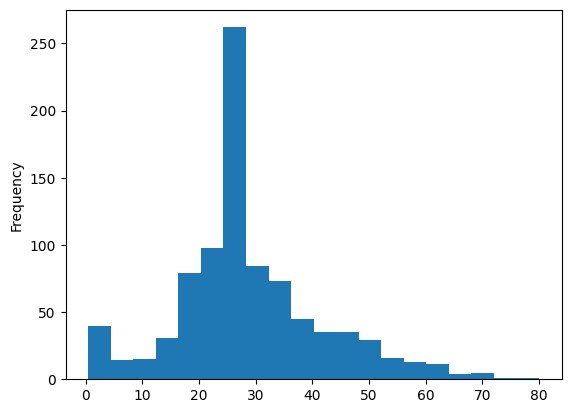

In [ ]:
titanic_df['Age'].plot(kind = 'hist', bins=20)

In [ ]:
#cabin='unknown'
titanic_df['Cabin'].fillna('Unknown', inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df['Cabin'].value_counts().head(5) #top-5 count

Cabin
Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
Name: count, dtype: int64

In [ ]:
#Embarked 의 최빈값으로 채우기
titanic_df['Embarked'].value_counts().head()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 전처리 연습


In [ ]:
df = pd.read_csv('./data/CARD_SUBWAY_MONTH_202102.csv', index_col= False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [ ]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204


In [ ]:
df.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
16746,20210228,중앙선,오빈,216,236,20210303
16747,20210228,중앙선,양평,3299,3187,20210303
16748,20210228,중앙선,원덕,322,304,20210303
16749,20210228,중앙선,용문,1899,1716,20210303
16750,20210228,중앙선,지평,30,31,20210303


In [ ]:
#총몇건인지 코드로 확인
df.shape

(16751, 6)

In [ ]:
#평균, 표준편차, 사분위수 등 주요 통계 지표를 확인하세요
df.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.675100e+04,16751.000000,16751.000000,1.675100e+04
mean,2.021021e+07,8567.344696,8536.474419,2.021023e+07
std,8.083073e+00,9006.651687,9064.054078,2.749315e+01
min,2.021020e+07,1.000000,0.000000,2.021020e+07
25%,2.021021e+07,2652.500000,2594.500000,2.021021e+07
50%,2.021022e+07,5857.000000,5733.000000,2.021022e+07
75%,2.021022e+07,11257.000000,11117.000000,2.021022e+07
max,2.021023e+07,88904.000000,87891.000000,2.021030e+07


In [ ]:
#몇 개의 컬럼이 있는지, 각 컬럼에 포함된 데이터들의 타입은 무엇인지 확인해보세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [ ]:
#‘노선명’ 컬럼이 가지고 있는 데이터의 종류와 갯수를 확인하세요
df['노선명'].unique().shape

(25,)

In [ ]:
df['노선명'].value_counts()

노선명
5호선         1484
7호선         1428
2호선         1400
경부선         1092
6호선         1051
분당선          967
3호선          937
경원선          821
경의선          737
4호선          728
9호선          700
중앙선          588
경인선          560
경춘선          532
수인선          504
8호선          476
공항철도 1호선     392
안산선          364
9호선2~3단계     364
우이신설선        364
경강선          308
일산선          282
1호선          280
과천선          224
장항선          168
Name: count, dtype: int64

In [ ]:
# ‘승차총승객수’ 컬럼을 기준으로 데이터를 정렬하세요

df.sort_values(by=['승차총승객수'], ascending=False)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
14984,20210226,2호선,강남,88904,87891,20210301
10857,20210219,2호선,강남,86800,80948,20210222
13705,20210223,2호선,강남,84922,83364,20210226
14314,20210224,2호선,강남,84628,82667,20210227
14384,20210225,2호선,강남,84374,82960,20210228
...,...,...,...,...,...,...
14136,20210224,6호선,신내,1,0,20210227
4678,20210208,분당선,복정,1,0,20210211
10025,20210217,경의선,김포공항,1,0,20210220
414,20210201,6호선,연신내,1,0,20210204


In [ ]:
#‘2호선’만 선택하세요.
df[df['노선명']=='2호선'].shape

(1400, 6)

In [ ]:
# ‘승차총승객수가’이 50000명 이상인 로우의 ‘역명’을 확인하세요.
df[df['승차총승객수']>=50000]['역명'].unique()

array(['구로디지털단지', '신림', '강남', '선릉', '잠실(송파구청)', '역삼', '홍대입구', '삼성(무역센터)'],
      dtype=object)

In [ ]:
# ‘등록일자’ 컬럼을 삭제하세요
df1 = df.drop(['등록일자'], axis=1)
df1

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20210201,중앙선,용문,1282,1259
1,20210201,중앙선,지평,48,43
2,20210201,중앙선,아신,415,413
3,20210201,중앙선,양수,1463,1466
4,20210201,중앙선,운길산,495,463
...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236
16747,20210228,중앙선,양평,3299,3187
16748,20210228,중앙선,원덕,322,304
16749,20210228,중앙선,용문,1899,1716


In [ ]:
#'승차총승객수’와 ‘하차총승객수’ 컬럼의 차이를 계산한 ‘승하차총승객수차이’ 컬럼을 생성하세요.
df['승하차총승객수'] = df['승차총승객수']-df['하차총승객수']
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수
0,20210201,중앙선,용문,1282,1259,20210204,23
1,20210201,중앙선,지평,48,43,20210204,5
2,20210201,중앙선,아신,415,413,20210204,2
3,20210201,중앙선,양수,1463,1466,20210204,-3
4,20210201,중앙선,운길산,495,463,20210204,32
...,...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303,-20
16747,20210228,중앙선,양평,3299,3187,20210303,112
16748,20210228,중앙선,원덕,322,304,20210303,18
16749,20210228,중앙선,용문,1899,1716,20210303,183


In [ ]:
df.rename(columns={'승하차총승객수':'승하차총승객수차이'}, inplace=True)
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수차이
0,20210201,중앙선,용문,1282,1259,20210204,23
1,20210201,중앙선,지평,48,43,20210204,5
2,20210201,중앙선,아신,415,413,20210204,2
3,20210201,중앙선,양수,1463,1466,20210204,-3
4,20210201,중앙선,운길산,495,463,20210204,32
...,...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303,-20
16747,20210228,중앙선,양평,3299,3187,20210303,112
16748,20210228,중앙선,원덕,322,304,20210303,18
16749,20210228,중앙선,용문,1899,1716,20210303,183


In [ ]:
#‘승하차총승객수차이’의 평균값을 계산하세요
df['승하차총승객수차이'].mean()

np.float64(30.870276401408873)

In [41]:
# 전체 중 10개의 아이템을 샘플링해서 데이터프레임을 생성하세요.
#.sample()
sample_df= df.sample(n=10)
sample_df

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
#sample_df의 ‘노선명’ 컬럼의 값이 1호선, 2호선, 3호선 4호선을 영어(line1, line2, line3, line4)로 변경하세요
sample_df['노선명'].replace(['1호선','2호선','3호선','4호선',],
                         ['line1','line2','line3','line4',],)


11619      경부선
14393    line2
7586       경원선
4853       분당선
6478       5호선
13727    line1
14576      7호선
16452      9호선
14217      5호선
16428      8호선
Name: 노선명, dtype: object

In [ ]:
# 인덱스를 ‘사용일자’로 바꾸어 설정
df2 = df.set_index('사용일자')
df2

,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수차이
사용일자,,,,,,
20210201,중앙선,용문,1282,1259,20210204,23
20210201,중앙선,지평,48,43,20210204,5
20210201,중앙선,아신,415,413,20210204,2
20210201,중앙선,양수,1463,1466,20210204,-3
20210201,중앙선,운길산,495,463,20210204,32
...,...,...,...,...,...,...
20210228,중앙선,오빈,216,236,20210303,-20
20210228,중앙선,양평,3299,3187,20210303,112
20210228,중앙선,원덕,322,304,20210303,18


In [ ]:
#‘사용일자’ 컬럼을 연도-월-일(예:2021-02-01)의 형태로 표시되도록 수정하세요.
#UDF 정의 getDate(data)

def getDate(data):
  dt = str(data)
  yy = dt[0:4]
  mm = dt[4:6]
  dd = dt[6:8]
  return yy+'-'+mm+'-'+dd

d='20210303'
getDate(d)

'2021-03-03'

In [ ]:
df2

,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수차이
사용일자,,,,,,
20210201,중앙선,용문,1282,1259,20210204,23
20210201,중앙선,지평,48,43,20210204,5
20210201,중앙선,아신,415,413,20210204,2
20210201,중앙선,양수,1463,1466,20210204,-3
20210201,중앙선,운길산,495,463,20210204,32
...,...,...,...,...,...,...
20210228,중앙선,오빈,216,236,20210303,-20
20210228,중앙선,양평,3299,3187,20210303,112
20210228,중앙선,원덕,322,304,20210303,18


In [ ]:
df1

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20210201,중앙선,용문,1282,1259
1,20210201,중앙선,지평,48,43
2,20210201,중앙선,아신,415,413
3,20210201,중앙선,양수,1463,1466
4,20210201,중앙선,운길산,495,463
...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236
16747,20210228,중앙선,양평,3299,3187
16748,20210228,중앙선,원덕,322,304
16749,20210228,중앙선,용문,1899,1716


In [ ]:
df1['사용일자1']= df1['사용일자'].apply(getDate)

0        2021-02-01
1        2021-02-01
2        2021-02-01
3        2021-02-01
4        2021-02-01
            ...    
16746    2021-02-28
16747    2021-02-28
16748    2021-02-28
16749    2021-02-28
16750    2021-02-28
Name: 사용일자, Length: 16751, dtype: object

In [ ]:
df['사용일자1'] = pd.to_datetime(df1['사용일자'], format='%Y%m%d')
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수차이,사용일자1
0,20210201,중앙선,용문,1282,1259,20210204,23,2021-02-01
1,20210201,중앙선,지평,48,43,20210204,5,2021-02-01
2,20210201,중앙선,아신,415,413,20210204,2,2021-02-01
3,20210201,중앙선,양수,1463,1466,20210204,-3,2021-02-01
4,20210201,중앙선,운길산,495,463,20210204,32,2021-02-01
...,...,...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303,-20,2021-02-28
16747,20210228,중앙선,양평,3299,3187,20210303,112,2021-02-28
16748,20210228,중앙선,원덕,322,304,20210303,18,2021-02-28
16749,20210228,중앙선,용문,1899,1716,20210303,183,2021-02-28


In [ ]:
sample_df

NameError: name 'sample_df' is not defined

In [ ]:
#원핫인코딩
dummies = pd.get_dummies(sample_df['노선명'], prefix='노선')
dummies.astype(int)

NameError: name 'sample_df' is not defined

In [ ]:
#노선명으로 그룹핑해서 승차,하차 총승객수의 평균을 계산
df


In [ ]:
df.groupby(['노선명'])['승하차총승객수차이'].mean()

In [ ]:
df.groupby(['노선명']).mean(numeric_only=True)